# Práctica: Análisis Factorial Exploratorio

> Requiere cargar el archivo ["smoke.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/smoke.sav) en el repositorio local. 

Eres un asistente de investigación de un grupo de Psicología de la Salud. En esta etapa preliminar, se te ha asignado evaluar la estructura factorial de una escala elaborada por tu grupo de investigación. 

In [ ]:
!pip install pyreadstat 
!pip install factor_analyzer

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_spss('smoke.sav')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns.values)
scaled_df.dropna(inplace=True)
scaled_df

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25
0,1.144538,0.845311,-0.623663,1.159459,-1.761410,-1.426881,-0.412549,0.853798,1.223217,-0.559233,...,-0.877338,-0.980196,-0.763370,-0.875545,1.134563,0.561337,-0.025206,-0.608895,-0.366505,0.950168
1,1.144538,0.845311,0.918171,1.159459,0.640513,1.683207,2.090248,0.853798,1.223217,1.304877,...,0.507933,0.070014,0.508913,0.051503,0.360997,0.561337,1.109048,1.248751,1.388859,0.076781
2,1.144538,0.845311,0.918171,0.025206,-0.160128,0.128163,1.255982,0.853798,0.295611,1.304877,...,1.893204,1.120224,1.781197,0.978550,0.360997,1.432377,1.109048,0.319928,1.388859,0.076781
3,-0.244168,-0.104359,-0.623663,0.025206,0.640513,-0.649359,-0.412549,-0.305838,0.295611,1.304877,...,0.507933,0.070014,0.508913,0.978550,-1.186134,0.561337,-0.025206,0.319928,-0.366505,-0.796605
4,-0.244168,0.845311,-0.623663,1.159459,-0.960769,0.905685,0.421717,-0.305838,-0.631995,-0.559233,...,-0.877338,-0.980196,0.508913,-0.875545,1.134563,0.561337,-0.025206,-0.608895,-0.366505,-0.796605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,-0.244168,-0.104359,0.918171,-2.243301,-0.960769,-0.649359,-0.412549,-0.305838,0.295611,-0.559233,...,0.507933,0.070014,0.508913,0.051503,-1.186134,-1.180743,-2.293713,0.319928,-0.366505,-0.796605
87,1.144538,-2.003699,-1.394580,0.025206,0.640513,-1.426881,-0.412549,0.853798,-2.487208,0.372822,...,-0.877338,0.070014,-0.763370,1.905597,-1.186134,0.561337,1.109048,-0.608895,0.511177,-0.796605
88,1.144538,0.845311,0.147254,1.159459,0.640513,0.905685,0.421717,-0.305838,1.223217,2.236931,...,-0.877338,0.070014,0.508913,-0.875545,1.134563,1.432377,1.109048,-0.608895,-0.366505,0.950168
89,1.144538,-0.104359,-1.394580,0.025206,-0.960769,0.128163,-1.246815,-0.305838,0.295611,-0.559233,...,-0.877338,-0.980196,-0.763370,-0.875545,0.360997,1.432377,1.109048,-0.608895,-1.244186,0.076781


## Parte 1: Supuestos de un AF

Evalúa la adecuación de los datos para un análisis factorial empleando las prueba de Bartlett y el índice KMO. ¿Qué puedes concluir?
> Sugerencia: Utiliza las funciones `calculate_bartlett_sphericity` y `calculate_kmo` disponibles en el paquete `factor_analyzer`. 

In [38]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Escribe tu respuesta aquí
statistic, p_value = calculate_bartlett_sphericity(scaled_df)
print("Chi-squared: ", statistic)
print("p-value: ", p_value)

Chi-squared:  898.496653867715
p-value:  1.7083712481171448e-61


Los resultados de la prueba de Bartlett señalan la existencia de correlaciones significativas entre las variables que componen nuestros datos.

In [39]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Escribe tu respuesta aquí
kmo_per_variable, kmo_total = calculate_kmo(scaled_df)

print("General MSA: ", kmo_total)
df_kmo_per_variable = pd.DataFrame(kmo_per_variable, index=scaled_df.columns.values, columns=['Individual MSA'])
df_kmo_per_variable

General MSA:  0.682211127997584


,Individual MSA
s1,0.570946
s2,0.625906
s3,0.683230
s4,0.583020
s5,0.639611
s6,0.612813
s7,0.856160
s8,0.584317
s9,0.560576
s10,0.681213


Los resultados de la prueba KMO sugieren niveles adecuados de MSA a nivel global. Sin embargo, a nivel individual se identifica a las variable `s21` y `s25` con un nivel de MSA inadecuado. Debido a ello, optamos por eliminarlas de nuestra matriz de datos:

In [40]:
scaled_df = scaled_df.drop(['s21','s25'], axis=1)
scaled_df

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s14,s15,s16,s17,s18,s19,s20,s22,s23,s24
0,1.144538,0.845311,-0.623663,1.159459,-1.761410,-1.426881,-0.412549,0.853798,1.223217,-0.559233,...,-0.972866,-1.340197,-0.877338,-0.980196,-0.763370,-0.875545,1.134563,-0.025206,-0.608895,-0.366505
1,1.144538,0.845311,0.918171,1.159459,0.640513,1.683207,2.090248,0.853798,1.223217,1.304877,...,0.010931,1.020279,0.507933,0.070014,0.508913,0.051503,0.360997,1.109048,1.248751,1.388859
2,1.144538,0.845311,0.918171,0.025206,-0.160128,0.128163,1.255982,0.853798,0.295611,1.304877,...,0.994729,1.020279,1.893204,1.120224,1.781197,0.978550,0.360997,1.109048,0.319928,1.388859
3,-0.244168,-0.104359,-0.623663,0.025206,0.640513,-0.649359,-0.412549,-0.305838,0.295611,1.304877,...,1.978526,-0.553372,0.507933,0.070014,0.508913,0.978550,-1.186134,-0.025206,0.319928,-0.366505
4,-0.244168,0.845311,-0.623663,1.159459,-0.960769,0.905685,0.421717,-0.305838,-0.631995,-0.559233,...,-0.972866,-0.553372,-0.877338,-0.980196,0.508913,-0.875545,1.134563,-0.025206,-0.608895,-0.366505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,-0.244168,-0.104359,0.918171,-2.243301,-0.960769,-0.649359,-0.412549,-0.305838,0.295611,-0.559233,...,0.010931,-0.553372,0.507933,0.070014,0.508913,0.051503,-1.186134,-2.293713,0.319928,-0.366505
87,1.144538,-2.003699,-1.394580,0.025206,0.640513,-1.426881,-0.412549,0.853798,-2.487208,0.372822,...,0.010931,1.807104,-0.877338,0.070014,-0.763370,1.905597,-1.186134,1.109048,-0.608895,0.511177
88,1.144538,0.845311,0.147254,1.159459,0.640513,0.905685,0.421717,-0.305838,1.223217,2.236931,...,1.978526,1.020279,-0.877338,0.070014,0.508913,-0.875545,1.134563,1.109048,-0.608895,-0.366505
89,1.144538,-0.104359,-1.394580,0.025206,-0.960769,0.128163,-1.246815,-0.305838,0.295611,-0.559233,...,-0.972866,-1.340197,-0.877338,-0.980196,-0.763370,-0.875545,0.360997,1.109048,-0.608895,-1.244186


## Parte 2: Número de factores a extraer

Utiliza el criterio de varianza explicada y el análisis paralelo de Horn para determinar el número de factores a extraer. ¿Qué puedes concluir?
> Sugerencia: Utiliza el método `get_factor_variance` de la función `FactorAnalyzer` disponible en el paquete `factor_analyzer`, y el método `parallel` de la función `fa` disponible en el paquete `Psych` del lenguaje de programación `R`.

In [41]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=scaled_df.shape[1],rotation=None)
fa.fit(scaled_df)

# Escribe tu respuesta aquí
variance, proportional_variance, cumulative_variance = fa.get_factor_variance()

df_var = pd.DataFrame([variance, proportional_variance, cumulative_variance],index=['SS Loadings', 'Proportional variance', 'Cumulative variance'])
df_var.columns += 1
df_var = df_var.add_prefix('F')
df_var

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23
SS Loadings,5.153687,2.660599,2.141114,1.455908,1.192712,1.112376,0.870924,0.602569,0.523920,0.462315,...,0.297392,0.223633,0.208602,0.114062,0.101101,0.059823,0.044154,0.037702,0.018361,0.000000
Proportional variance,0.224073,0.115678,0.093092,0.063300,0.051857,0.048364,0.037866,0.026199,0.022779,0.020101,...,0.012930,0.009723,0.009070,0.004959,0.004396,0.002601,0.001920,0.001639,0.000798,0.000000
Cumulative variance,0.224073,0.339752,0.432843,0.496144,0.548001,0.596365,0.634231,0.660430,0.683209,0.703310,...,0.767245,0.776969,0.786038,0.790998,0.795393,0.797994,0.799914,0.801553,0.802352,0.802352


In [42]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages(c("psych","GPArotation"),dependencies=TRUE)

Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


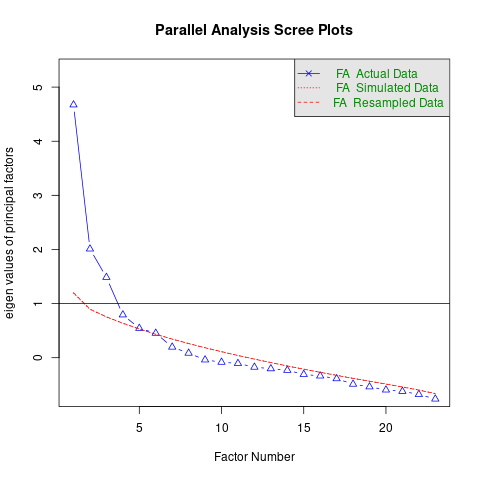

In [58]:
%%R
library(foreign)
library(psych)

# Cargamos los datos en el entorno R
dat <- read.spss("smoke.sav", to.data.frame = TRUE)
dat <- subset (dat, select = -c(21,25))

# Escribe tu respuesta aquí
parallel <- fa.parallel(dat, n.iter=1000, fa="fa")

El criterio de varianza explicada sugiere que debemos preservar al menos 6 factores. En contraste, el método de análisis paralelo sugiere retener 4 factores. Podemos optar por retener 4 factores, apostando a contar con una estructura factorial más simple. 

## Parte 3: Extracción y rotación de factores

Extrae el número de factores que determinaste en el paso anterior empleando una rotación "Varimax".
> Sugerencia: Utiliza la función `FactorAnalyzer` disponible en el paquete `factor_analyzer`. 

In [44]:
fa = FactorAnalyzer(n_factors=4,rotation="varimax")
fa.fit(scaled_df)

loadings = pd.DataFrame(fa.loadings_, index=scaled_df.columns)
print("Cargas Factoriales:")
loadings.columns += 1
loadings = loadings.add_prefix("F")
loadings

Cargas Factoriales:


,F1,F2,F3,F4
s1,-0.112693,-0.150560,0.876180,0.080346
s2,0.037928,0.465222,0.191923,-0.041117
s3,0.331726,0.330737,-0.176721,0.117428
s4,-0.147491,0.478326,-0.015342,0.197960
s5,0.188821,0.364363,0.072598,0.535344
s6,0.080207,0.393121,-0.096604,0.698871
s7,0.487498,0.515793,0.192685,0.282594
s8,0.028719,0.259655,0.405550,-0.040404
s9,0.254974,0.131389,0.387863,-0.002873
s10,0.474563,0.250505,0.416027,0.078840


## Parte 4: Interpretación de factores

1. Examina la signifcancia estadística de las cargas factoriales. Debido al tamaño de muestra, utiliza un punto de corte de .6. ¿Qué observas?
>Sugerencia: Utiliza el método `diagram` de la función `fa` disponible en el paquete `Psych` del lenguaje de programación `R`. 

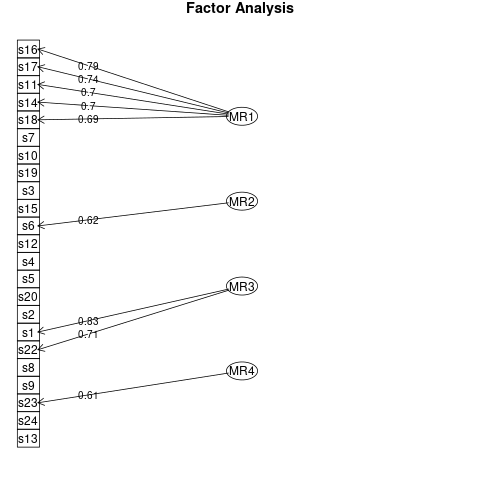

In [59]:
%%R
# Extrae los factores
fit <- fa(dat, nfactors=4,rotate="varimax")

# Genera gráfico de la estructura factorial
structure <- fa.diagram(fit, digits=2, cut=.6)

Puede apreciarse que 14 variables no cuentan con cargas factoriales estadísticamente significativas. 

2. Evalúa la razón de cargas al cuadrado. ¿Qué observas?

In [46]:
def cross_loading_eval(ratio):
    if ratio < 1.5:
        return 'Problematic'
    elif ratio < 2:
        return 'Potential'
    else:
        return 'Ignorable'

# Escribe tu respuesta aquí
squared_loadings = pd.DataFrame(fa.loadings_**2, index=scaled_df.columns)
squared_loadings.columns += 1 
squared_loadings = squared_loadings.add_prefix("F")
squared_loadings['Ratio'] = squared_loadings.apply(lambda x: x.nlargest(2).values[0] / x.nlargest(2).values[1], axis=1)
squared_loadings['Classification'] = squared_loadings['Ratio'].apply(cross_loading_eval)
print("Cargas Factoriales al cuadrado:")
squared_loadings

Cargas Factoriales al cuadrado:


,F1,F2,F3,F4,Ratio,Classification
s1,0.012700,0.022668,0.767691,0.006456,33.866200,Ignorable
s2,0.001439,0.216432,0.036834,0.001691,5.875817,Ignorable
s3,0.110042,0.109387,0.031230,0.013789,1.005993,Problematic
s4,0.021754,0.228795,0.000235,0.039188,5.838355,Ignorable
s5,0.035653,0.132760,0.005271,0.286593,2.158728,Ignorable
s6,0.006433,0.154544,0.009332,0.488420,3.160390,Ignorable
s7,0.237654,0.266043,0.037127,0.079860,1.119454,Problematic
s8,0.000825,0.067421,0.164471,0.001632,2.439478,Ignorable
s9,0.065012,0.017263,0.150438,0.000008,2.314010,Ignorable
s10,0.225210,0.062753,0.173078,0.006216,1.301202,Problematic


Puede apreciarse que las variables `s3`, `s7`, `s10` y `s24` son clasificadas como problemáticas debido a sus cargas factoriales cruzadas.

3. Evalúa las comunalidades. ¿Qué observas?
> Sugerencia: Utiliza el método `get_communalities` de la función `FactorAnalyzer` disponible en el paquete `factor_analyzer`.

In [47]:
communalities = pd.DataFrame(fa.get_communalities(),index=scaled_df.columns.values, columns=["Communalities"])
communalities

,Communalities
s1,0.809514
s2,0.256395
s3,0.264449
s4,0.289973
s5,0.460277
s6,0.658730
s7,0.620684
s8,0.234349
s9,0.232721
s10,0.467256


Puede observarse que las variables s2, s3, s4, s5, s8, s9, s10, s12, s13, s15, s19, s20, s23 y s24 presentan comunalidades inaceptables. 

4. En función a tus observaciones, re-especifica el modelo. Justifica la selección de la nueva estructura factorial.
> Sugerencia: Dado el tamaño de muestra pequeño, considera eliminar las variables con comunalidades o razones de cargas al cuadrado inaceptables. Esto para aumentar la cantidad de casos por cada variable.

In [50]:
problematic_vars = ['s3','s7','s10','s24','s2','s4','s5','s8','s9','s12','s13','s15','s19','s20','s23']
new_df = scaled_df.drop(columns=problematic_vars)
new_df

,s1,s6,s11,s14,s16,s17,s18,s22
0,1.144538,-1.426881,-0.949639,-0.972866,-0.877338,-0.980196,-0.763370,-0.025206
1,1.144538,1.683207,0.365246,0.010931,0.507933,0.070014,0.508913,1.109048
2,1.144538,0.128163,1.680131,0.994729,1.893204,1.120224,1.781197,1.109048
3,-0.244168,-0.649359,2.995015,1.978526,0.507933,0.070014,0.508913,-0.025206
4,-0.244168,0.905685,0.365246,-0.972866,-0.877338,-0.980196,0.508913,-0.025206
...,...,...,...,...,...,...,...,...
86,-0.244168,-0.649359,0.365246,0.010931,0.507933,0.070014,0.508913,-2.293713
87,1.144538,-1.426881,-0.949639,0.010931,-0.877338,0.070014,-0.763370,1.109048
88,1.144538,0.905685,1.680131,1.978526,-0.877338,0.070014,0.508913,1.109048
89,1.144538,0.128163,-0.949639,-0.972866,-0.877338,-0.980196,-0.763370,1.109048


Parallel analysis suggests that the number of factors =  2  and the number of components =  NA 


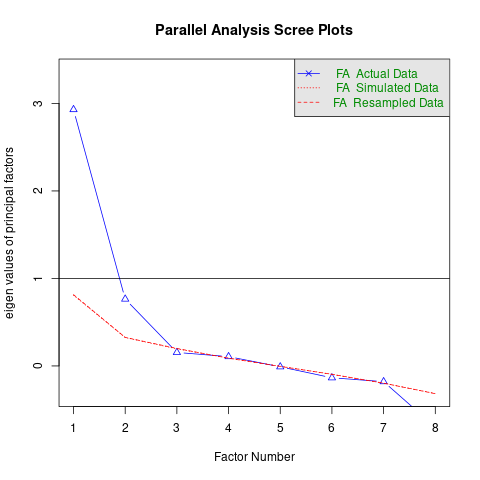

In [60]:
%%R
# Cargamos los datos en el entorno R
dat <- read.spss("smoke.sav", to.data.frame = TRUE)
dat <- subset (dat, select = -c(21,25))
dat <- subset (dat, select = -c(s3,s7,s10,s24,s2,s4,s5,s8,s9,s12,s13,s15,s19,s20,s23))


# Parallel Analysis with Psych package.
parallel <- fa.parallel(dat, n.iter=1000, fa="fa")

In [56]:
re_fa = FactorAnalyzer(n_factors=2,rotation="varimax")
re_fa.fit(new_df)

loadings = pd.DataFrame(re_fa.loadings_, index=new_df.columns)
print("Cargas Factoriales:")
loadings.columns += 1
loadings = loadings.add_prefix('F')
loadings

Cargas Factoriales:


,F1,F2
s1,-0.060040,0.952800
s6,0.222031,-0.080508
s11,0.763047,0.099368
s14,0.681626,0.135245
s16,0.804959,-0.052277
s17,0.770467,-0.049004
s18,0.835279,0.032364
s22,0.052957,0.714264


Después de eliminar 15 variables con valores inaceptables de comunalidad o razón de cargas al cuadrado, se exploró nuevamente la cantidad de factores a extraer. El método de análisis paralelo sugirió la extracción de dos factores. Se tomó esta recomendación y se extrajeron los factores ortogonalmente.

1. Elabora una propuesta de estructura factorial creando una variable `factor_index`. Describe la estructura factorial propuesta, considerando sus fortalezas y debilidades.

In [55]:
factor_index = {'F1': ['s6','s11','s14','s16','s17','s18'], 
                'F2': ['s1','s22']}

factor_index

{'F1': ['s6', 's11', 's14', 's16', 's17', 's18'], 'F2': ['s1', 's22']}

In [57]:
squared_loadings = pd.DataFrame(re_fa.loadings_**2, index=new_df.columns)
squared_loadings.columns += 1 
squared_loadings = squared_loadings.add_prefix("F")
squared_loadings['Ratio'] = squared_loadings.apply(lambda x: x.nlargest(2).values[0] / x.nlargest(2).values[1], axis=1)
squared_loadings['Classification'] = squared_loadings['Ratio'].apply(cross_loading_eval)
print("Cargas Factoriales al cuadrado:")
squared_loadings

Cargas Factoriales al cuadrado:


,F1,F2,Ratio,Classification
s1,0.003605,0.907827,251.840412,Ignorable
s6,0.049298,0.006482,7.605804,Ignorable
s11,0.582241,0.009874,58.967498,Ignorable
s14,0.464614,0.018291,25.400857,Ignorable
s16,0.647959,0.002733,237.097022,Ignorable
s17,0.593620,0.002401,247.203195,Ignorable
s18,0.697690,0.001047,666.114139,Ignorable
s22,0.002804,0.510173,181.915075,Ignorable


In [53]:
communalities = pd.DataFrame(re_fa.get_communalities(),index=new_df.columns.values, columns=['Communalities'])
communalities

,Communalities
s1,0.911432
s6,0.055780
s11,0.592115
s14,0.482905
s16,0.650692
s17,0.596021
s18,0.698738
s22,0.512977


La estructura de dos factores sugerida tiene la fortaleza de contar con cargas cruzadas ignorables y cargas factoriales estadísticamente significativas en todas las variables, a excepción de `s6`. Del mismo modo, se cuentan con valores de comunialidades aceptables para todas las variables, excepto `s6`. Estos indicadores pueden mejorar si se considerar eliminar dicha variable.

La principal debilidad de la estructura factorial propuesta es que puede que no represente la totalidad de la información concebida al momento de elaborar la escala psicométrica, puesto que se eliminó más de la mitad de los ítems disponibles para llegar a ella. 

Por tanto, los resultados obtenidos hasta el momento son de naturaleza preliminar y puede recomendarse al grupo de investigación que aumente el tamaño de muestra antes de definir una estructura factorial u optar por eliminar items del instrumento que se encuentran construyendo. 